In [1]:
from sympy import *
init_printing(use_latex=True)

In [2]:
# Symbols
d1, d2, d3 = symbols('d_1 d_2 d_3')
b0, b1, b2 = symbols('beta_0 beta_1 beta_2')
g0, g1, g2 = symbols('gamma_0 gamma_1 gamma_2')
G0, G1, G2 = symbols('Gamma_0 Gamma_1 Gamma_2')
Pqq1, Pqq2 = symbols('{P^(1)_qq} {P^(2)_qq}')
Pqg1, Pqg2 = symbols('{P^(1)_qg} {P^(2)_qg}')
Pgq1, Pgq2 = symbols('{P^(1)_gq} {P^(2)_gq}')
Pgg1, Pgg2 = symbols('{P^(1)_gg} {P^(2)_gg}')
Rqq1, Rqq2 = symbols('{R^(1)_qq} {R^(2)_qq}')
Rqg1, Rqg2 = symbols('{R^(1)_qg} {R^(2)_qg}')
Iqq1, Iqg1 = symbols('{I^(1)_qq} {I^(1)_qg}')
PgQ1, PgQ2 = symbols('{P^(1)_gQ} {P^(2)_gQ}') 
PqQ2, RqQ2 = symbols('{P^(2)_qQ} {R^(2)_qQ}')
J1, J2 = symbols('J_1 J_2')
LT = symbols('L_\perp')
Lt = symbols('(L_\perp/2)')

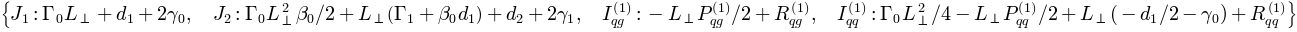

In [3]:
# Create dictionary for substitutions
Eqs={}
Eqs[J1]    = d1 + 2*g0 + G0*LT
Eqs[J2]    = d2 + 2*g1 + (b0*d1 + G1)*LT + b0*G0*LT**2/2
Eqs[Iqq1]  = -(d1/2 + g0)*LT + G0*LT**2/4 - Pqq1*LT/2 + Rqq1
Eqs[Iqg1]  = -Pqg1*LT/2 + Rqg1
Eqs

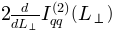

In [4]:
Iqq2 = Function('{I^(2)_qq}')
LHS = 2*Iqq2(LT).diff(LT)
LHS

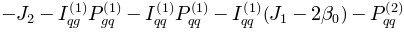

In [5]:
RHS = - Pqq2-(J1-2*b0)*Iqq1-J2-Iqq1*Pqq1-Iqg1*Pgq1
RHS

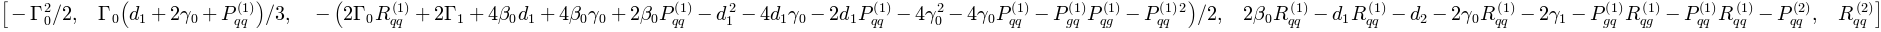

In [6]:
sol=dsolve(Eq(LHS, RHS.subs(Eqs)), Iqq2(LT))
ics=solve(sol.subs(LT,0), sol.free_symbols)[0] 
finalsol = (sol.subs(ics).subs(Iqq2(0), Rqq2)).rhs
a=Poly(finalsol.subs(LT,2*Lt), Lt)
factor(a.coeffs())

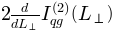

In [7]:
Iqg2 = Function('{I^(2)_qg}')
LHS = 2*Iqg2(LT).diff(LT)
LHS

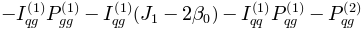

In [8]:
RHS = - Pqg2-(J1-2*b0)*Iqg1-Iqq1*Pqg1-Iqg1*Pgg1
RHS

$$- \frac{\Gamma_{0} R^{(1)}_{qq}}{4} - \frac{\Gamma_{1}}{4} + \frac{P^{(1)}_{gq} P^{(1)}_{qg}}{8}$$

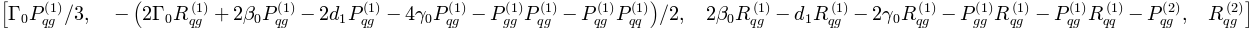

In [9]:
sol=dsolve(Eq(LHS, RHS.subs(Eqs)), Iqg2(LT))
ics=solve(sol.subs(LT,0), sol.free_symbols)[0] 
finalsol = (sol.subs(ics).subs(Iqg2(0), Rqg2)).rhs
a=Poly(finalsol.subs(LT,2*Lt), Lt)
factor(a.coeffs())

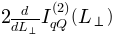

In [10]:
IqQ2 = Function('{I^(2)_qQ}')
LHS = 2*IqQ2(LT).diff(LT)
LHS

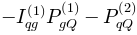

In [11]:
RHS = - PqQ2-Iqg1*PgQ1
RHS

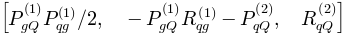

In [12]:
sol=dsolve(Eq(LHS, RHS.subs(Eqs)), IqQ2(LT))
ics=solve(sol.subs(LT,0), sol.free_symbols)[0] 
finalsol = (sol.subs(ics).subs(IqQ2(0), RqQ2)).rhs
a=Poly(finalsol.subs(LT,2*Lt), Lt)
factor(a.coeffs())